<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJsvYgJM9yVJSfOSolVAxgchr7GdSVROuIVg&usqp=CAU"  align="left" width=280/>


# LST heterodyne camera sensitivity calculator
This script calculates the mapping speed (i.e., observing time for a 1-deg^2 area for given parameters) with the following assumptions: 
- Observing method: the conventional On-The-Fly (OTF) mapping (e.g., Sawada et al. 2008)
- Frequency coverage: 84 - 500 GHz, 600 - 720, and 780 - 850 GHz* 
- Receiver specifications: Same as ALMA receivers
- Elevation angle: 60 deg. 
- Aperture and angular resolution:
    - The full aperture (D = 50 m) will be used for observations up to 420 GHz
    - The inner 30-m aperture will be used for observations in high-frequency (f > 420 GHz)
- Weather condition: an appropriate PWV value is automatically selected for each frequency**

To execute,
- input the observing parameters as needed
- Runtime > Run all, or select each cell and type "Shift+Enter"
- The download link for the CSV file will appear in some calculations

---
\* Atmospheric transmission is very low at 500 - 600 GHz and 720 - 780 GHz<br>
\** For more details, see ALMA Technical Handbook 9.1.1.

## Parameters for mapping observations with the heterodyne receiver array
- Please modify parameters as needed for your science cases.

In [1]:
dV = 0.3               # velocity resolution (km/s)
N_beam = 100.          # number of beams
dTa_des = 0.3          # desired sensitivity in the antenna temperature scale (K)
D2 = 30.               # optional diameter of the LST (m), default is D2 = 30m for high-frequency observation 

## Loading packeges

In [2]:
!pip install -q "deshima-sensitivity==0.4.0"
!pip install -q itables
!pip install -q git+https://github.com/ishiishun/heterodyne_sensitivity.git
import heterodyne_sensitivity.LST_heterodyne_sensitivity_package as hs
import itables
import itables.options as opt
itables.init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## System noise tempereture

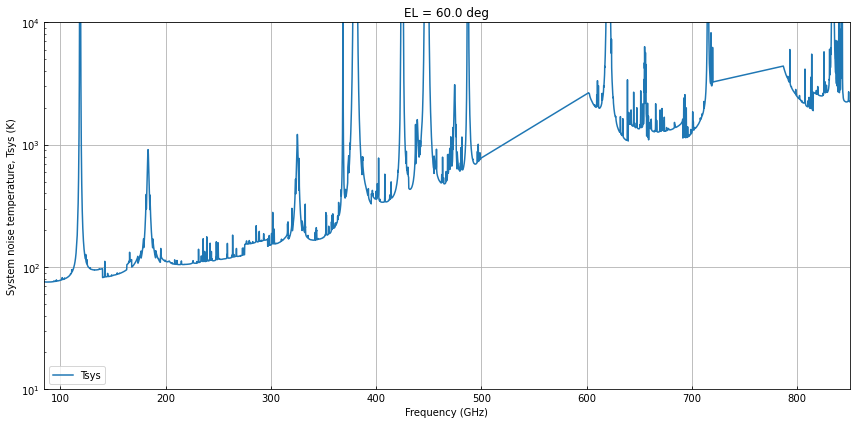

In [3]:
df_Tsyss = hs.load_Tsys()
hs.PlotTsys(df_Tsyss)

##  Angular resolution (HPBW) in arcsec
- blue: HPBW of the full aperture of LST 
- gren: HPBW for D2. Default value (D2 = 30 m) shows the HPBW for the inner 30-m aperture of LST for high-frequency (> 420 GHz) observations

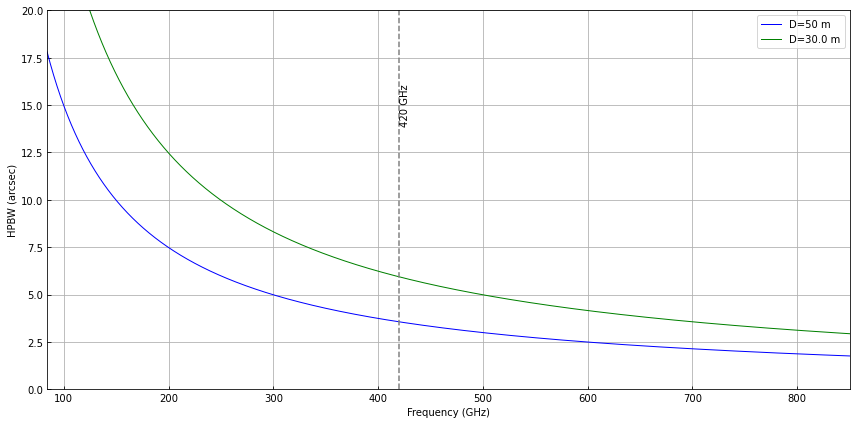

In [4]:
hs.PlotHPBW_LST(D2)

## Calculation of the mapping spped: time of a 1 deg^2 area mapping for given parameters

In [5]:
df_dTa, N_beam, t_dump, dTa_des = hs.get_dTa(df_Tsyss, dV = dV, N_beam = N_beam, dTa_des = dTa_des, D2 = D2) 

## Emission lines to be plotted and listed  (transition: frequency in GHz)
- Please modify the list as needed. 

In [6]:
lines = {
    '12CO(1-0)': 115.271,
    '12CO(2-1)': 230.538,
    '12CO(3-2)': 345.796, 
    '12CO(4-3)': 461.04077,
    '12CO(6-5)': 691.47308,
    '12CO(7-6)': 806.65181,
    '13CO(1-0)': 110.201,
    '13CO(2-1)': 220.399,
    '13CO(3-2)': 330.588,
    '13CO(4-3)': 440.765,
    '13CO(6-5)': 661.067,
    '13CO(7-6)': 771.184,
    'C18O(1-0)': 109.782,
    'C18O(2-1)': 219.56,
    'C18O(3-2)': 329.331,
    'C18O(4-3)': 439.089,
    'C18O(6-5)': 658.553,
    'C18O(7-6)': 768.251,
    'CS(2-1)': 97.980,
    'CS(3-2)': 146.969,
    'CS(4-3)': 195.954,
    'CS(5-4)': 244.953,
    'CS(6-5)': 293.912,
    'CS(7-6)': 342.882,
    'HCN(1-0)': 88.631,
    'HCN(2-1)': 177.261,
    'HCN(3-2)': 265.886,
    'HCN(4-3)': 354.505,
    'HCN(5-4)': 443.116,
    'CI(1-0)': 492.160,
    'CI(2-1)': 809.3
    }

## Checking the list

In [7]:
df_lines = hs.make_df_lines_low(lines, df_dTa)

13CO(7-6) at 771.184000 is out of frequency coverage due to low atmospheric transmission
C18O(7-6) at 768.251000 is out of frequency coverage due to low atmospheric transmission


## Plot of the mapping speed with the lines up to 400 GHz

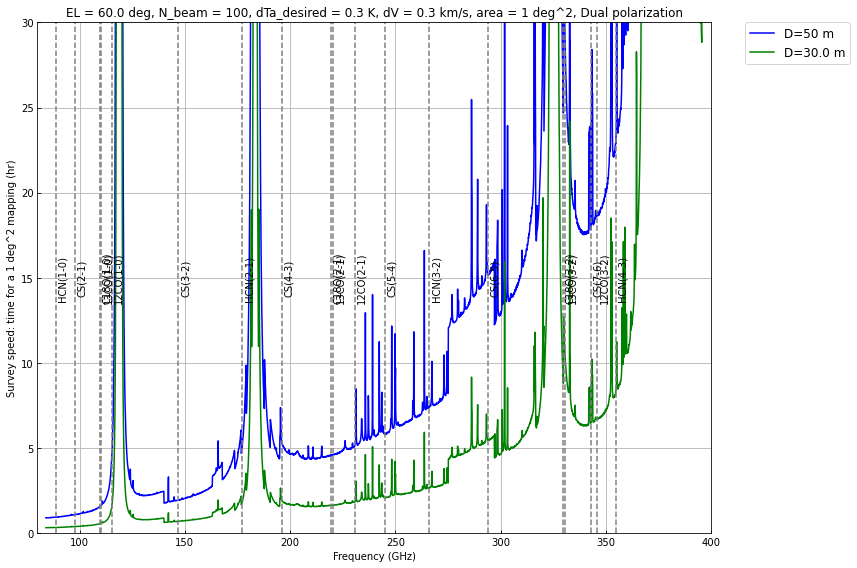

In [8]:
hs.PlotSurveySpeed(df_dTa, N_beam, dTa_des, dV, df_lines, D2)

## Plot of the mapping spded with the lines in 350 - 500 GHz

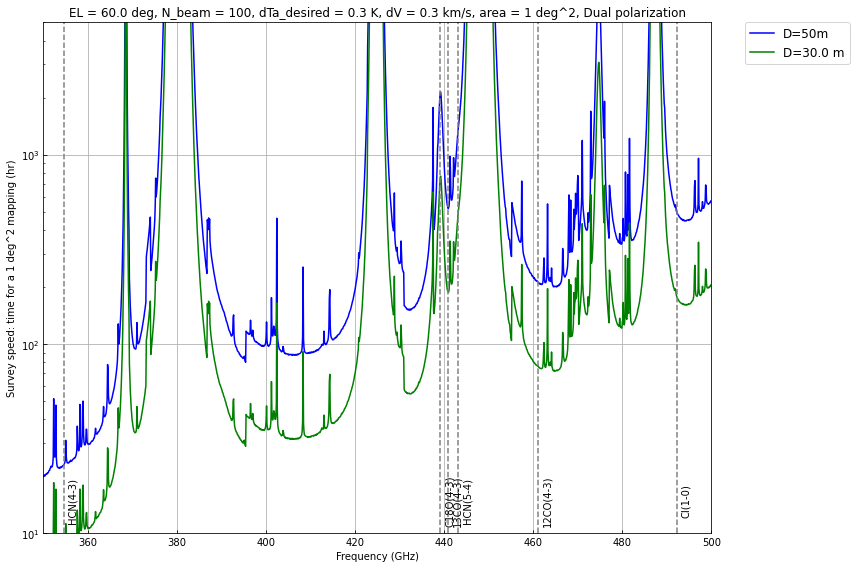

In [9]:
hs.PlotSurveySpeed2(df_dTa, N_beam, dTa_des, dV, df_lines, D2)

## Plot of the mapping spped at high-frequency (> 420 GHz) 

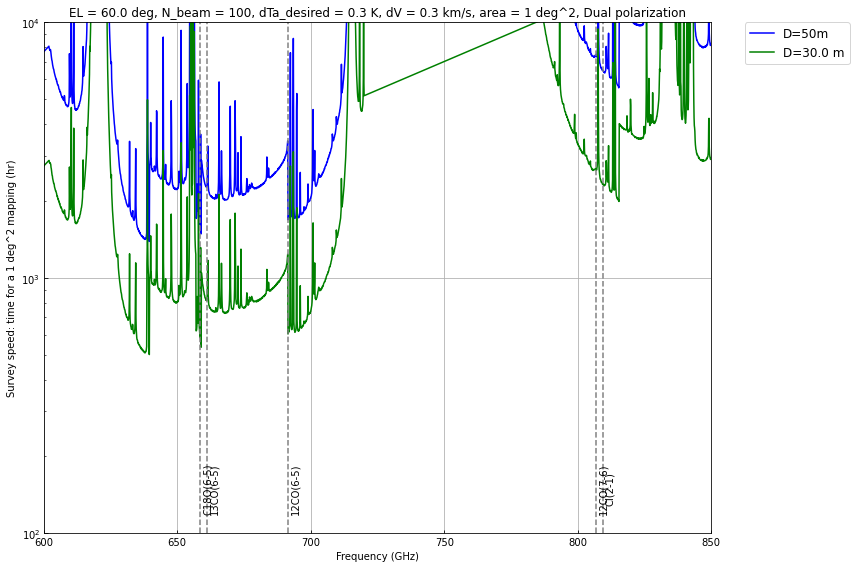

In [10]:
hs.PlotSurveySpeedHigh(df_dTa, N_beam, dTa_des, dV, df_lines, D2)

## Show summary 

In [11]:
opt.lengthMenu = [100]
itables.show(df_lines)
hs.export_list(df_lines)

Loading... (need help?)
